In [94]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dummy import *

plt.style.use('ggplot')

# Linear methods : Comparison

For each vector (*Difficulty and Ability*) we have two linar methods including or not the notion of attempts.

Here is a summary of the result for the application of those methods

We have 4 different possibilities.


In [77]:
subs = generate_submissions(users=50, pbls=10)
bm = bianary_mat(subs)
bm

,U00000,U00001,U00002,U00003,U00004,U00005,U00006,U00007,U00008,U00009,...,U00040,U00041,U00042,U00043,U00044,U00045,U00046,U00047,U00048,U00049
P00001,0,0,1,1,1,0,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
P00002,1,0,0,1,0,1,0,1,1,0,...,0,1,1,0,0,0,1,1,0,0
P00004,1,1,1,0,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
P00005,1,1,1,1,0,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
P00006,1,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,1
P00007,1,1,0,1,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
P00008,1,0,1,1,0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
P00009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
P00000,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
P00003,0,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1


In [78]:
def linear1(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return  (row[1] * vector).sum() / len(row[1])

def linear2(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return 1 - ((row[1] * vector).sum()  / len(row[1]))

def linear3(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return  (row[1] * vector).sum() / len(row[1])

def process_bianary_mat(bm, rel_v, f=linear1, name='V', Horiz=False):
    '''
    evaluate the vector from a bm using a method
    and relatively to another vector
    '''
    # evaluate for each row of the binary table
    bmm = bm
    if Horiz:
        bmm=bm.T
    
    vector = [f(row, rel_v) for row in bmm.iterrows()]
    vector = pd.Series(vector, index=bmm.index, 
                             name=name)
    normalize(vector)
    
    return vector

In [79]:
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Difficulties')
normalize(Difficulties)

In [80]:
Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities')
normalize(Abilities)

## Difficultied first

In [81]:
#Difficulties = process_bianary_mat(bm, Abilities, name=Difficulties.name)
Difficulties = process_bianary_mat(bm, Abilities,f=linear2 , name=Difficulties.name)
Abilities = process_bianary_mat(bm, Difficulties, name=Abilities.name, Horiz=True)

In [82]:
dfAbl = pd.DataFrame(Abilities)

In [83]:
dfDiff = pd.DataFrame(Difficulties)

## Abilities First

In [84]:
Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities')
normalize(Abilities)
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Difficulties')
normalize(Difficulties)
Abilities = process_bianary_mat(bm, Difficulties, name=Abilities.name+"2", Horiz=True)
Difficulties = process_bianary_mat(bm, Abilities,f=linear2 , name=Difficulties.name+"2")

In [85]:
dfAbl[Abilities.name] = Abilities

In [86]:
dfDiff[Difficulties.name] = Difficulties

<IPython.core.display.Javascript object>


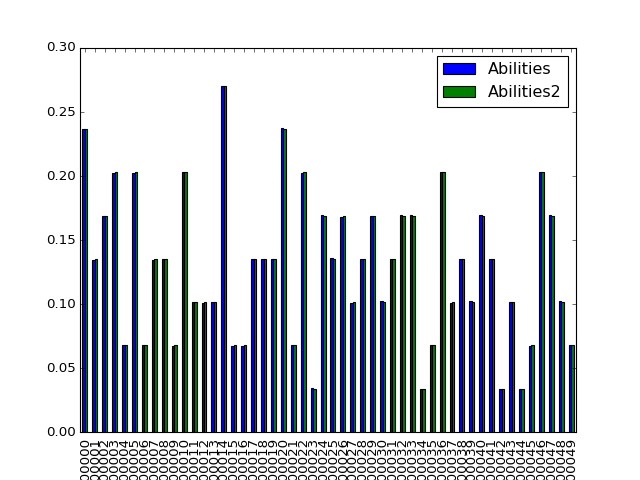

In [87]:
dfAbl.plot(kind='bar')

<IPython.core.display.Javascript object>


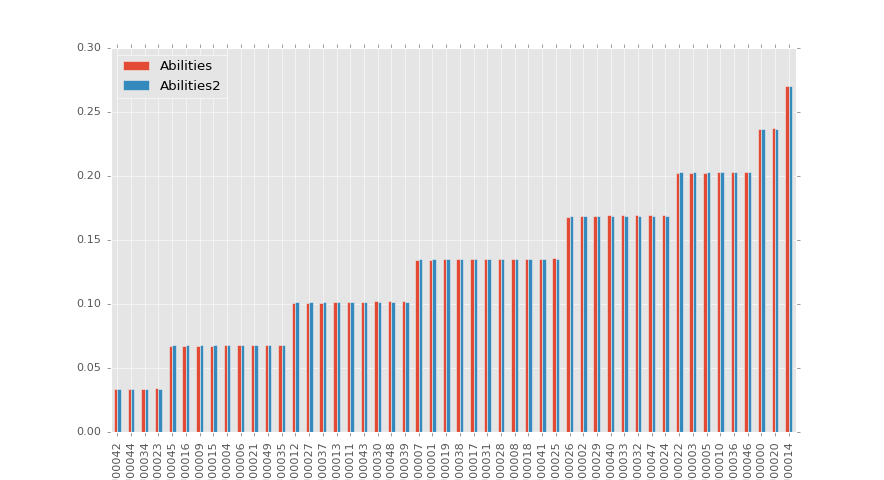

<IPython.core.display.Javascript object>


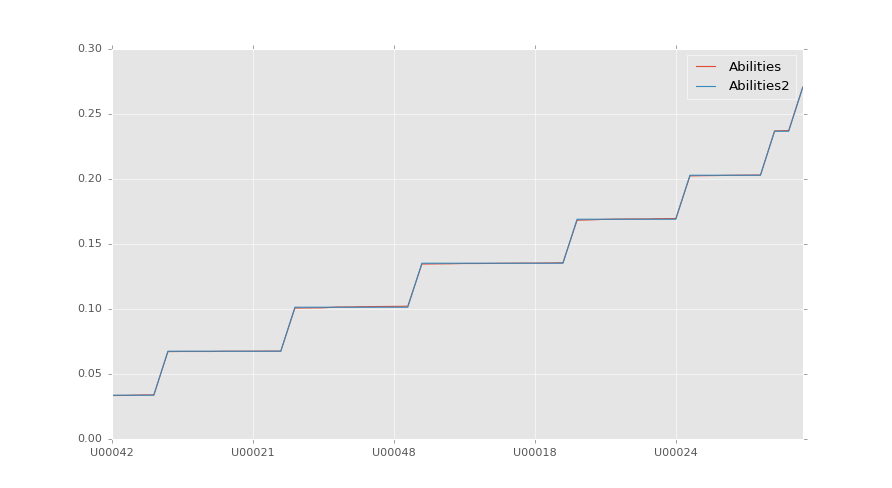

In [96]:
g = dfAbl
g.sort_values(by='Abilities', inplace=True)
g.plot(kind='bar')
g.plot()

<IPython.core.display.Javascript object>


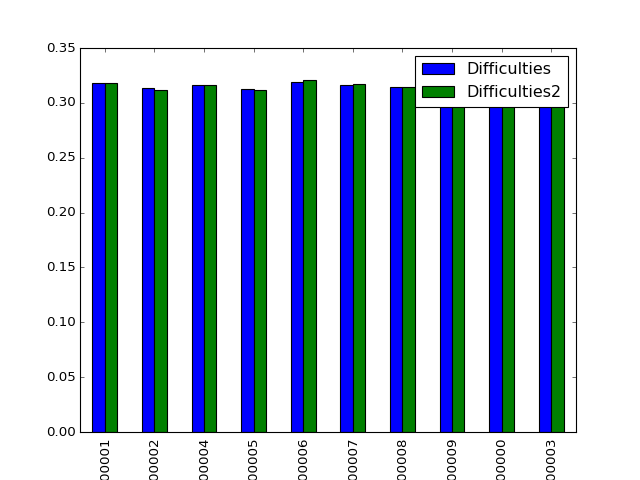

In [89]:
dfDiff.plot(kind='bar')

<IPython.core.display.Javascript object>


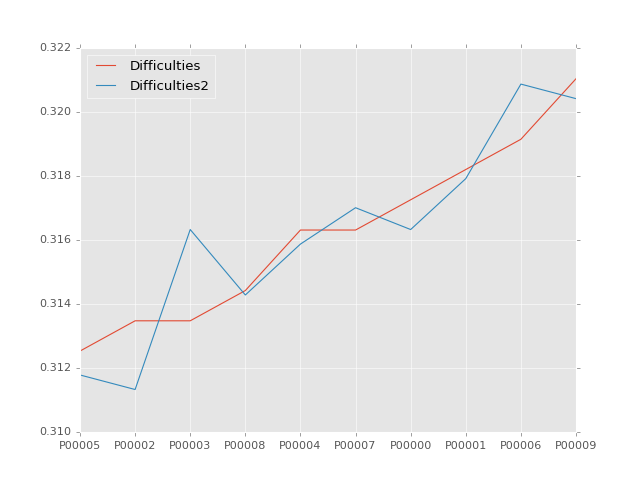

In [95]:
g = dfDiff
g.sort_values(by='Difficulties', inplace=True)
g.plot()